In [1]:
import os
import numpy as np
import yaml
import matplotlib.pyplot as plt
import cuvis
from cuvis_ai.preprocessor import PCA, NMF
from cuvis_ai.pipeline import Pipeline
from cuvis_ai.unsupervised import KMeans

In [2]:
# Construct a simple pipeline

In [3]:
pipes = Pipeline('tomato_test')

In [4]:
# Load a sample image
data = cuvis.SessionFile('C:\Measurements\Botanic_garden_2\Auto_001.cu3s').get_measurement(0)
sample_cube = data.data.get('cube').array

In [5]:
# Stage 1 - Dimensionality Reduction
pca_stage = PCA(n_components=100)
pca_stage.fit(sample_cube)
out = pca_stage.forward(sample_cube)

In [6]:
# Stage 2 - Dimensionality Reduction (Redundanct, but included for example)
pca_stage2 = PCA(n_components=10)
pca_stage2.fit(out)
out2 = pca_stage2.forward(out)

In [7]:
# Stage 3 - Upsupervised classification
kmeans_stage = KMeans(n_clusters=4)
kmeans_stage.fit(out2)

In [8]:
pipes.add_stage(pca_stage)
pipes.add_stage(pca_stage2)
pipes.add_stage(kmeans_stage)

Single stage pipeline!


In [9]:
pipes.pipeline

In [17]:
pipes.forward(sample_cube)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

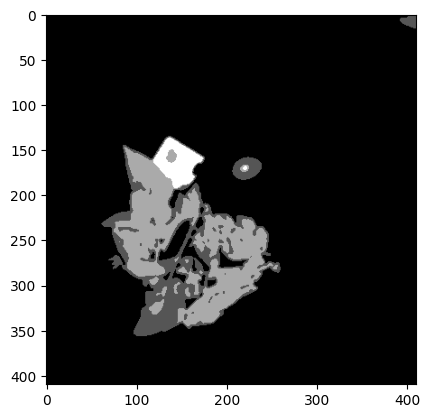

In [19]:
plt.figure()
plt.imshow(pipes.forward(sample_cube), cmap='grey')

In [11]:
pipes.serialize()

Project saved to ~/tomato_test_2024_03_04_16_20_30.zip


In [12]:
pipes_load = Pipeline('tomato_test_3')

In [21]:
pipes_load.load('/home/nathaniel/tomato_test_2024_03_04_16_20_30.zip')

Single stage pipeline!


In [22]:
pipes_load.pipeline

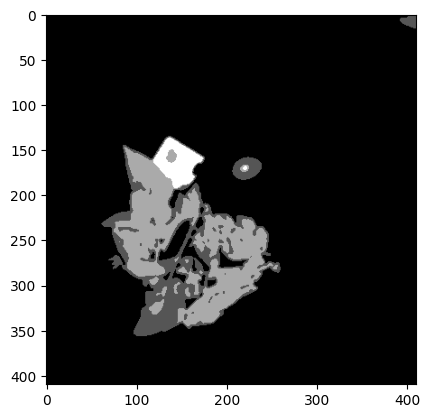

In [23]:
plt.figure()
plt.imshow(pipes_load.forward(sample_cube), cmap='grey')